In [2]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

In [3]:
uploader = widgets.FileUpload(accept='.jpg', multiple=False)
display(uploader)

FileUpload(value={}, accept='.jpg', description='Upload')

In [4]:
def convert_upload(upload):
    file = upload
    file_name = str(list(file.keys())[0])
    bytes_image = file[file_name]['content']
    PIL_image = Image.open(io.BytesIO(bytes_image))
    return PIL_image

In [5]:
PIL_image = convert_upload(uploader.value)

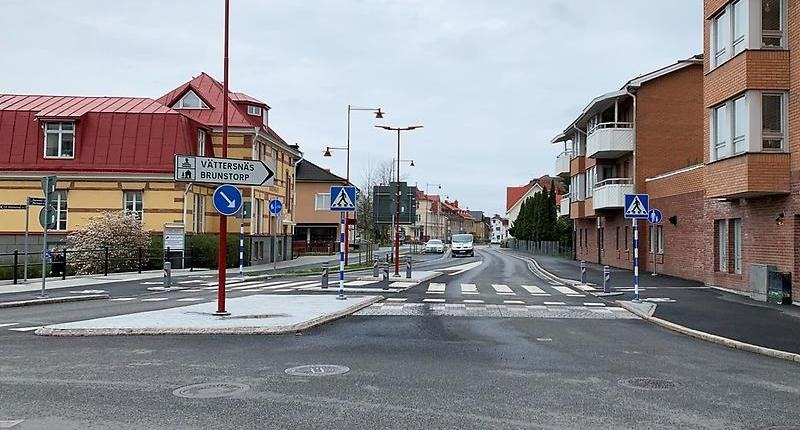

In [6]:
PIL_image

In [7]:
print(PIL_image.size)
print(PIL_image.height)
print(PIL_image.width)
print(PIL_image.format)
print(PIL_image.mode)

(800, 430)
430
800
JPEG
RGB


In [8]:
uploader.close()

In [9]:
import torch
from torchvision.transforms import transforms

from application.src.models.faster_rcnn import RCNNModel
from application.src.utils.presentation import get_relevant_scores, show

In [10]:
def load_model():
    from application.src.config import DEVICE, MODEL_NAME, OUT_DIR

    model_path = str(OUT_DIR) + '/' + str(MODEL_NAME) + '.pth'

    nm = RCNNModel()
    nm.model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    nm.model.eval()

    return nm

def print_result(labels: list, scores=None) -> None:
    """
    Print the labels and, if we predict a random image, the accuracy score.
    Only prints the signs that with more than 60% accuracy
    :param labels: list; list with the predicted or actual signs
    :param scores: list[int]; list with accuracy scores, only when predicted. None by default
    :return: None
    """
    if scores:
        [print(f'Sign: {label} - Accuracy: {scores[i]}%') for i, label in enumerate(labels)]
    else:
        [print(f'Sign: {label}') for label in labels]

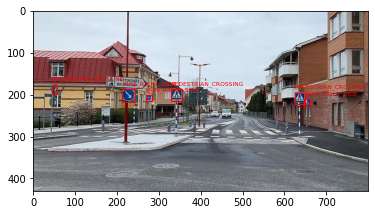

Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 83%
Sign: PASS_RIGHT_SIDE - Accuracy: 24%
Sign: PEDESTRIAN_CROSSING - Accuracy: 8%


In [12]:
model = load_model()
transform = transforms.Compose([transforms.ToTensor()])

image = transform(PIL_image)
image = image.view(1, 3, image.shape[1], image.shape[2])

labels, scores, boxes = model.predict(image)

# labels, scores, boxes = get_relevant_scores(labels, scores, boxes)

show(PIL_image, labels, boxes)
print_result(labels, scores)